<a href="https://colab.research.google.com/github/daniellegauthier/color-data-analysis/blob/main/RGB_Root_Matriz_Color.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To run this code, press the little play button at the top left corner of the code cell.<br><br>
The first cell is interactive and requires you to type in the name of the sequence you would like to view from the list. Hit enter.<br><br>
The second cell takes a while to load and requires la matrice.csv from https://github.com/daniellegauthier/color-data-analysis<br><br>
<br>
# Color Sequences as Navigation Tools in Condensed Experience Systems
## Theoretical Framework
The concept of "condensed experience systems" introduced by Stanislav and Christina Grof in their development of holotropic breathwork provides a unique lens through which to view altered states of consciousness. When combined with Roger Walsh's groundbreaking research on synesthesia in meditation practitioners, we can begin to understand the potential of color sequences as navigation tools in consciousness exploration.<br>
## Research Background
Walsh's findings challenge the traditional view of synesthesia as a rare, fixed perceptual phenomenon:<br>
35% of meditation retreatants report synesthetic experiences<br>
63% of regular meditators experience synesthesia<br>
86% of advanced meditation teachers report synesthetic perceptions<br>
These statistics suggest that synesthesia may be a cultivatable skill rather than an innate trait.<br>
<br>
## Potential Benefits of Color Sequence Navigation

1. Enhanced Emotional Processing<br>
<br>
Color sequences can serve as emotional anchors<br>
Each color transition potentially facilitates movement between different emotional states<br>
<br>

2. Accelerated Integration of Experiences<br>

Colors act as condensed symbols for complex experiential states<br>
The systematic progression through color sequences may facilitate:<br>
Trauma resolution<br>
Integration of peak experiences<br>
Navigation of challenging psychological material<br>
<br>
3. Improved Meditation Outcomes<br>

Color-based navigation may provide:<br>

More reliable access to desired states of consciousness<br>
Clearer markers of progression in meditative practice<br>
Enhanced ability to map and reproduce beneficial states<br>

<br>


4. Clinical Applications<br>

Potential therapeutic tools for:<br>

PTSD treatment<br>
Anxiety management<br>
Schizophrenic healing<br>


Provides a structured approach to exploring non-ordinary states of consciousness<br>



## Technical Implementation
Our Python-based analysis system builds upon these theoretical foundations by:<br>

Mapping color sequences to emotional and experiential states<br>
Analyzing the wave-like properties of color transitions<br>
Exploring the semantic relationships between colors and psychological states<br>

## Research Implications

Develops progressively with practice<br>
Shows consistent patterns across practitioners<br>
Correlates with depth of meditative experience<br>
<br>
By treating color sequences as non-commutative wave functions, so red is confromal to time, we may better model the actual experiential nature of consciousness exploration, providing a more accurate framework for both research and practical applications.<br>

## Key Questions for Exploration:

How can we quantify the effectiveness of color sequences in navigating condensed experiences?<br>
What role does the order of colors play in the therapeutic process?<br>
Can we develop more effective therapeutic protocols by understanding the wave-like properties of color sequences?<br>

Available pathways:
- plot
- knot
- pain
- practical
- spiritual
- prayer
- sad
- precise
- fem
- masc
- direct

Choose a pathway: knot

Analyzing pathway 'knot' with colors ['white', 'blue', 'green', 'red', 'black', 'brown', 'yellow', 'purple']...


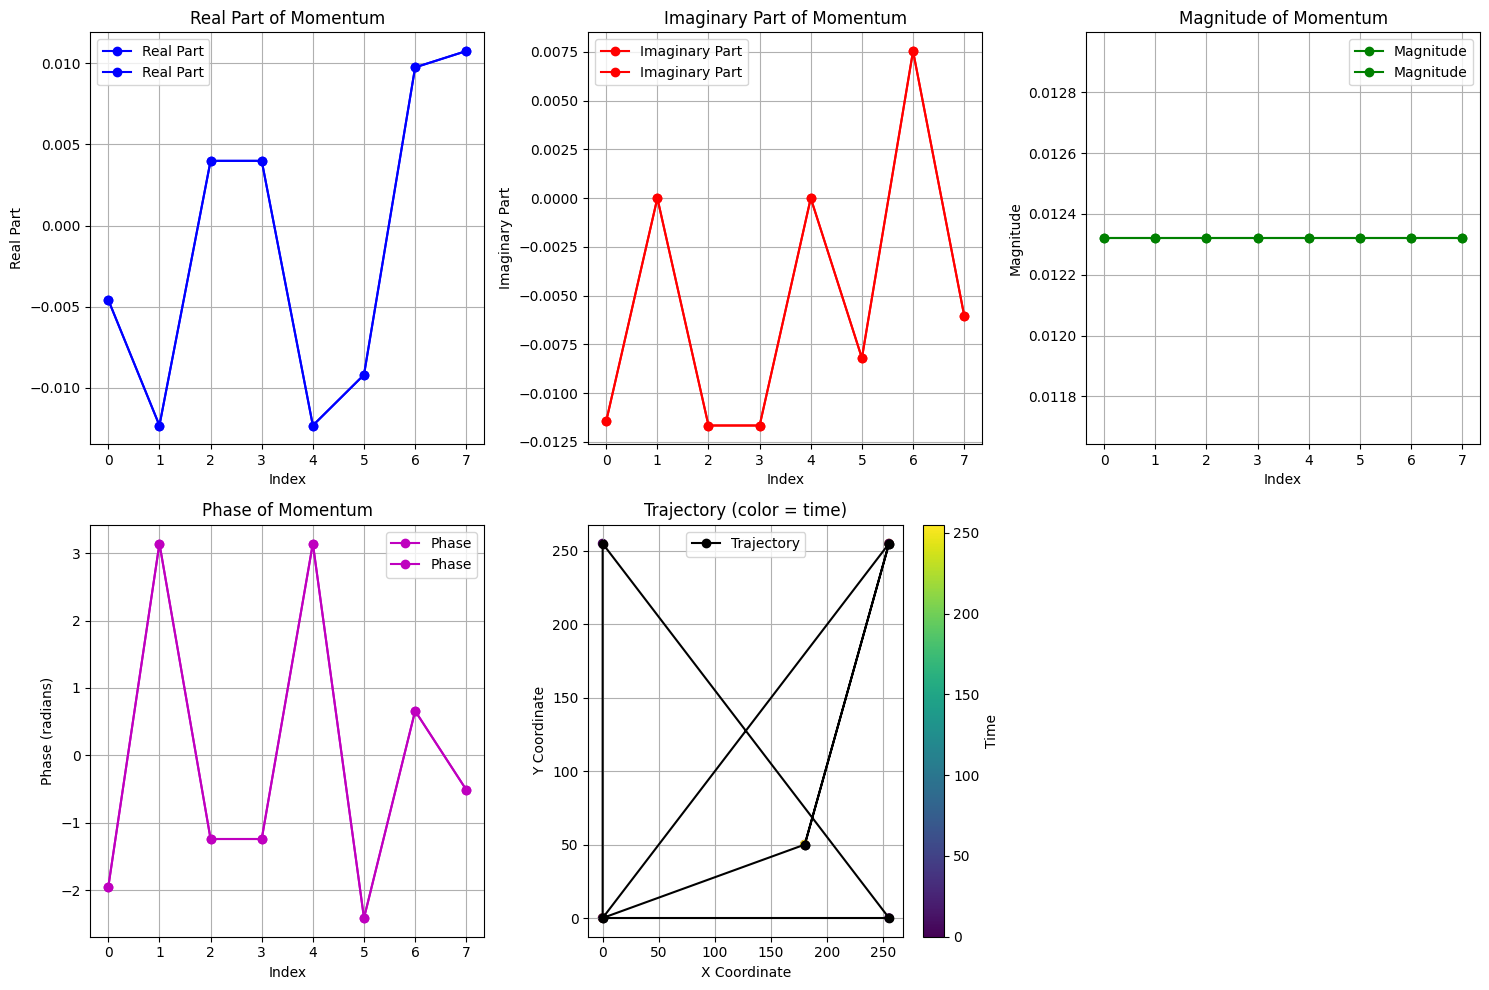

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_2d_wave_momentum_interpolation(x_coords, y_coords, t_coords):
    """
    Calculate 2D wave momentum from (x, y) coordinates and corresponding time values using linear interpolation.
    """
    x_coords = np.array(x_coords)
    y_coords = np.array(y_coords)
    t_coords = np.array(t_coords)

    direction = np.array([x_coords[1] - x_coords[0], y_coords[1] - y_coords[0]])
    direction_norm = np.linalg.norm(direction)
    if direction_norm != 0:
        direction = direction / direction_norm

    wavelength = np.linalg.norm([x_coords[1] - x_coords[0], y_coords[1] - y_coords[0]])
    k_mag = (2 * np.pi / wavelength)
    k = k_mag * direction

    momentums = []
    for x_coord, y_coord, t_coord in zip(x_coords, y_coords, t_coords):
        phase = np.dot([x_coord, y_coord], direction) - np.dot([x_coord, y_coord], direction) / wavelength * t_coord
        momentum = k * np.exp(1j * phase)
        momentums.append(momentum)

    return np.array(momentums)

# Pathways mapped to color sequences
pathways = {
    'plot': ['grey', 'pink', 'gold', 'nude', 'orange'],
    'knot': ['white', 'blue', 'green', 'red', 'black', 'brown', 'yellow', 'purple'],
    'pain': ['gold', 'orange'],
    'practical': ['yellow', 'green'],
    'spiritual': ['blue', 'brown'],
    'prayer': ['nude', 'white'],
    'sad': ['purple', 'grey', 'red'],
    'precise': ['pink', 'black'],
    'fem': ['brown', 'gold', 'orange', 'pink'],
    'masc': ['red', 'blue', 'orange'],
    'direct': ['red', 'orange']
}

# Predefined movement sequences for each color
color_sequences = {
    'gold': {'x': [250], 'y': [200], 't': [0]},
    'orange': {'x': [1250], 'y': [110], 't': [0]},
    'yellow': {'x': [255], 'y': [255], 't': [0]},
    'green': {'x': [0], 'y': [255], 't': [0]},
    'blue': {'x': [0], 'y': [0], 't': [255]},
    'brown': {'x': [180], 'y': [50], 't': [0]},
    'nude': {'x': [250], 'y': [180], 't': [120]},
    'white': {'x': [255], 'y': [255], 't': [255]},
    'purple': {'x': [180], 'y': [50], 't': [255]},
    'grey': {'x': [170], 'y': [170], 't': [170]},
    'red': {'x': [255], 'y': [0], 't': [0]},
    'pink': {'x': [250], 'y': [0], 't': [90]},
    'black': {'x': [0], 'y': [0], 't': [0]}
}

def plot_momentum_analysis(x_coords, y_coords, t_coords):
    momentums = calculate_2d_wave_momentum_interpolation(x_coords, y_coords, t_coords)

    real_parts = np.real(momentums)
    imaginary_parts = np.imag(momentums)
    magnitudes = np.abs(momentums)
    phases = np.angle(momentums)

    fig = plt.figure(figsize=(15, 10))

    # Plot momentum components
    plt.subplot(2, 3, 1)
    plt.plot(real_parts, 'bo-', label='Real Part')
    plt.title('Real Part of Momentum')
    plt.xlabel('Index')
    plt.ylabel('Real Part')
    plt.legend()
    plt.grid(True)

    plt.subplot(2, 3, 2)
    plt.plot(imaginary_parts, 'ro-', label='Imaginary Part')
    plt.title('Imaginary Part of Momentum')
    plt.xlabel('Index')
    plt.ylabel('Imaginary Part')
    plt.legend()
    plt.grid(True)

    plt.subplot(2, 3, 3)
    plt.plot(magnitudes, 'go-', label='Magnitude')
    plt.title('Magnitude of Momentum')
    plt.xlabel('Index')
    plt.ylabel('Magnitude')
    plt.legend()
    plt.grid(True)

    plt.subplot(2, 3, 4)
    plt.plot(phases, 'mo-', label='Phase')
    plt.title('Phase of Momentum')
    plt.xlabel('Index')
    plt.ylabel('Phase (radians)')
    plt.legend()
    plt.grid(True)

    # Plot trajectory
    plt.subplot(2, 3, 5)
    plt.plot(x_coords, y_coords, 'ko-', label='Trajectory')
    plt.scatter(x_coords, y_coords, c=t_coords, cmap='viridis')
    plt.colorbar(label='Time')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Trajectory (color = time)')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    sequence_name = f"{chosen_pathway}_{'_'.join(colors)}.png"
    plt.savefig(sequence_name)
    plt.show()

# User interface
print("Available pathways:")
for key in pathways:
    print(f"- {key}")

chosen_pathway = input("\nChoose a pathway: ").lower()

if chosen_pathway in pathways:
    colors = pathways[chosen_pathway]
    x_coords, y_coords, t_coords = [], [], []

    for color in colors:
        if color in color_sequences:
            seq = color_sequences[color]
            x_coords.extend(seq['x'])
            y_coords.extend(seq['y'])
            t_coords.extend(seq['t'])

    print(f"\nAnalyzing pathway '{chosen_pathway}' with colors {colors}...")
    plot_momentum_analysis(x_coords, y_coords, t_coords)
else:
    print("Invalid pathway choice. Please run the program again and select a valid pathway.")

In [ ]:
!pip install pandas numpy scikit-learn nltk gensim spacy textblob english-words
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 28.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for english-words: filename=english_words-2.0.1-py3-none-any.whl size=8196236 sha256=1e3e97b9512b04f1f38beead0f1f2a880a932dc95dcb4d08095e742e4f35dfff
  Stored in directory: /root/.cache/pip/wheels/f0/e6/d9/16a123647999fe535f03a36e7af23eef203736d84c7ca25b0b
Successfully built english-words
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 52.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import nltk
from nltk.corpus import wordnet as wn
from gensim.models import Word2Vec
import spacy
from textblob import TextBlob
from english_words import get_english_words_set
import warnings
warnings.filterwarnings('ignore')

# Download required NLTK data
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

# Load spaCy model
nlp = spacy.load('en_core_web_sm')

# Get English words set
english_words_set = get_english_words_set(['web2'], lower=True)

def load_and_prepare_data(file_path):
    df = pd.read_csv(file_path)
    string_columns = df.select_dtypes(include=['object']).columns
    for col in string_columns:
        df[col] = df[col].astype(str)
    return df

def normalize_rgb(df):
    rgb_vectors = df[['r', 'g', 'b']].values.astype(float)
    return rgb_vectors / 255.0

def get_color_similarity(normalized_rgb):
    return cosine_similarity(normalized_rgb)

def calculate_word_color_similarity(word, color_name):
    # Using spaCy for word similarity
    word_doc = nlp(str(word))
    color_doc = nlp(str(color_name))
    semantic_similarity = word_doc.similarity(color_doc)

    return semantic_similarity

def get_word_properties(word):
    word = str(word)
    blob = TextBlob(word)
    sentiment = blob.sentiment.polarity
    doc = nlp(word)
    pos_tag = doc[0].pos_
    length = len(word)
    return sentiment, pos_tag, length

def find_replacement_words(color_name, rgb_vector, existing_words, n=5):
    potential_words = set()
    filtered_words = {word for word in english_words_set if len(word) > 2}
    sampled_words = set(np.random.choice(list(filtered_words), 1000))

    existing_words = set(str(word) for word in existing_words)
    for word in sampled_words:
        if word not in existing_words:
            potential_words.add(word)

    word_scores = []
    for word in potential_words:
        sentiment, pos_tag, length = get_word_properties(word)
        color_similarity = calculate_word_color_similarity(word, color_name)

        # Scoring system incorporating both sentiment and color similarity
        score = (0.5 * sentiment) + (0.5 * color_similarity) + (0.1 / length)
        word_scores.append((word, score, sentiment, color_similarity))

    # Sort by overall score and get top n
    word_scores.sort(key=lambda x: x[1], reverse=True)
    return [(word, score, sent, color_sim) for word, score, sent, color_sim in word_scores[:n]]

def main():
    df = load_and_prepare_data('la matrice.csv')
    normalized_rgb = normalize_rgb(df)
    color_similarity = get_color_similarity(normalized_rgb)

    results = []
    for i, row in df.iterrows():
        color = str(row['color'])
        rgb_vector = normalized_rgb[i]
        existing_words = df['matrice'].tolist() + df['matrice1'].tolist()

        replacement_words_with_scores = find_replacement_words(color, rgb_vector, existing_words)

        # Format replacement words with scores
        formatted_replacements = [
            {
                'word': word,
                'overall_score': round(score, 3),
                'sentiment_score': round(sent, 3),
                'color_similarity': round(color_sim, 3)
            }
            for word, score, sent, color_sim in replacement_words_with_scores
        ]

        results.append({
            'color': color,
            'rgb': f"({row['r']}, {row['g']}, {row['b']})",
            'original_matrice': str(row['matrice']),
            'original_matrice1': str(row['matrice1']),
            'replacement_suggestions': formatted_replacements
        })

    results_df = pd.DataFrame(results)
    return results_df, color_similarity

if __name__ == "__main__":
    results_df, color_similarity = main()

    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 1000)
    pd.set_option('display.max_colwidth', None)

    print("Color Word Replacement Analysis:")
    for _, row in results_df.iterrows():
        print(f"\nColor: {row['color']} {row['rgb']}")
        print(f"Original matrice words: {row['original_matrice']} / {row['original_matrice1']}")
        print("Replacement suggestions:")
        for suggestion in row['replacement_suggestions']:
            print(f"  - {suggestion['word']}")
            print(f"    Overall Score: {suggestion['overall_score']}")
            print(f"    Sentiment Score: {suggestion['sentiment_score']}")
            print(f"    Color Similarity: {suggestion['color_similarity']}")
        print("-" * 50)

    print("\nColor Similarity Matrix:")
    color_sim_df = pd.DataFrame(color_similarity, columns=results_df['color'], index=results_df['color'])
    print(color_sim_df)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Color Word Replacement Analysis:

Color: grey (170, 170, 170)
Original matrice words: lose / Cover 
Replacement suggestions:
  - redoubtable
    Overall Score: 0.649
    Sentiment Score: 0.6
    Color Similarity: 0.68
  - respectable
    Overall Score: 0.464
    Sentiment Score: 0.5
    Color Similarity: 0.409
  - eurite
    Overall Score: 0.443
    Sentiment Score: 0.0
    Color Similarity: 0.854
  - otolaryngologist
    Overall Score: 0.437
    Sentiment Score: 0.0
    Color Similarity: 0.862
  - nitrosulphate
    Overall Score: 0.436
    Sentiment Score: 0.0
    Color Similarity: 0.857
--------------------------------------------------

Color: pink (250, 0, 90)
Original matrice words: place / Category 
Replacement suggestions:
  - cushy
    Overall Score: 0.768
    Sentiment Score: 0.9
    Color Similarity: 0.596
  - exotic
    Overall Score: 0.505
    Sentiment Score: 0.5
    Color Similarity: 0.476
  - uninfiniteness
    Overall Score: 0.386
    Sentiment Score: 0.0
    Color Simi